## **FTW Batch 4 Case Study**

###What measures should be done to reduce unallocated Grab bookings in Metro Manila?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving DataSeerGrabPrizeData.csv to DataSeerGrabPrizeData.csv


In [4]:
# Read the csv file
data = pd.read_csv('DataSeerGrabPrizeData.csv')

In [5]:
# Get the overview of the dataset
data.head()

,source,created_at_local,pick_up_latitude,pick_up_longitude,drop_off_latitude,drop_off_longitude,city,fare,pick_up_distance,state
0,ADR,2013-09-22 23:46:18.000000,14.604348,120.998654,14.537370,120.994423,Metro Manila,281.875,0.389894,CANCELLED
1,T47,2013-11-04 03:51:59.000000,14.590099,121.082645,14.508611,121.019444,Metro Manila,413.125,2.209770,COMPLETED
2,T47,2013-11-21 05:21:24.000000,14.582707,121.061458,14.537752,121.001379,Metro Manila,277.500,2.702910,COMPLETED
3,ADR,2013-09-16 20:53:34.000000,14.585812,121.060171,14.575915,121.085487,Metro Manila,220.625,0.321403,CANCELLED
4,IOS,2013-09-10 23:49:16.000000,14.552010,121.051260,14.630210,120.995920,Metro Manila,378.125,0.667067,COMPLETED


In [6]:
# Summarize the count and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265073 entries, 0 to 265072
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   source              265073 non-null  object 
 1   created_at_local    265073 non-null  object 
 2   pick_up_latitude    265073 non-null  float64
 3   pick_up_longitude   265073 non-null  float64
 4   drop_off_latitude   265073 non-null  float64
 5   drop_off_longitude  265073 non-null  float64
 6   city                265073 non-null  object 
 7   fare                265073 non-null  float64
 8   pick_up_distance    144541 non-null  float64
 9   state               265073 non-null  object 
dtypes: float64(6), object(4)
memory usage: 20.2+ MB


In [7]:
# Summarize the quantitative measures of the data
data.describe()

,pick_up_latitude,pick_up_longitude,drop_off_latitude,drop_off_longitude,fare,pick_up_distance
count,265073.000000,265073.000000,265073.000000,265073.000000,265073.000000,144541.000000
mean,14.561490,121.046757,14.558914,121.037733,146.325406,1.258160
std,0.315575,0.198375,0.364478,1.044046,591.375429,35.076018
min,-41.437247,114.172050,-41.401779,-77.038043,0.000000,0.000896
25%,14.552890,121.018340,14.550930,121.016200,0.000000,0.485546
50%,14.571390,121.034437,14.566120,121.034070,168.125000,0.941609
75%,14.600570,121.057020,14.604960,121.055217,242.500000,1.652430
max,22.282030,147.138581,38.907490,147.181090,201098.750000,13332.300000


In [ ]:
# Pandas Profiling can also be used to view the data summary
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
! pip install -U pandas-profiling

In [9]:
# Importing Pandas Profiling
from pandas_profiling import ProfileReport

In [10]:
# Creating profile report of Grab Bookings 2013
profile = ProfileReport(data, title='Grab Bookings 2013', html={'style':{'full_width': True}}, explorative ='True')

In [ ]:
# Print the profile report via notebook
# This is optional if the next step will be executed
profile.to_notebook_iframe()

In [12]:
# Create an HTML file about the overview of the Grab bookings in 2013
profile.to_file(output_file="Grab_Bookings_2013.html")

# **Grab 2013 Bookings Status**

**Pie Chart**

In [ ]:
matched = len(data[data['state']=="COMPLETED"][data['city'] == 'Metro Manila'])
cancelled = len(data[data['state'] == "CANCELLED"][data['city'] == 'Metro Manila'])
unallocated = len(data[data['state'] == "UNALLOCATED"][data['city'] == 'Metro Manila'])
total_bookings = matched + cancelled + unallocated

In [15]:
print('The number of completed bookings in Metro Manila is', matched)
print('The number of canceled bookings in Metro Manila is', cancelled)
print('The number of unallocated bookings in Metro Manila is', unallocated)
print('Total of bookings in Metro Manila is', total_bookings)

The number of completed bookings in Metro Manila is 114514
The number of canceled bookings in Metro Manila is 29934
The number of unallocated bookings in Metro Manila is 119930
Total of bookings in Metro Manila is 264378


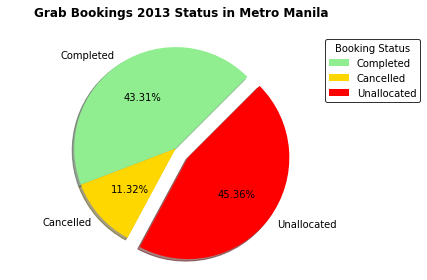

In [17]:
# Creating pie chart to show matched & unallocated Grab bookings
ride_status = ['Completed', 'Cancelled', 'Unallocated']
frequency = [matched, cancelled, unallocated]
colors = ['lightgreen', 'gold', 'red']

# Explode the pie chart to emphasize a certain part or some parts( Firm B in this case) 
# This is useful because it makes the highlighted portion more visible.
Explode = [0,0, 0.15] 


plt.pie(frequency, explode=Explode, labels=ride_status, autopct='%1.2f%%', startangle=45, colors = colors, shadow = True)
plt.title('Grab Bookings 2013 Status in Metro Manila\n', va ='center', weight = 'bold', fontsize = 12)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

leg = plt.legend(title="Booking Status", loc = "upper right", bbox_to_anchor=(1.20, 1.0), frameon = True)
leg.get_frame().set_linewidth(1.0)
leg.get_frame().set_edgecolor('black')

plt.tight_layout()

# Saving our map as .png file.
plt.savefig('pie_chart.png', dpi=300)

**Bar Graph**

# **Using GeoPandas to locate areas in Metro Manila**

In [ ]:
# To work with geospatial data in Python
! pip install geopandas

In [ ]:
# Python Shape File Library
! pip install pyshp

In [30]:
# Loading libraries to work with geospatial data
import descartes
import geopandas as gpd

from shapely.geometry import Point, Polygon

**Plotting Metro Manila Map**

In [31]:
# Reading the shape file via geopandas
metro_manila = gpd.read_file('MetroManila/Metropolitan Manila.shp')

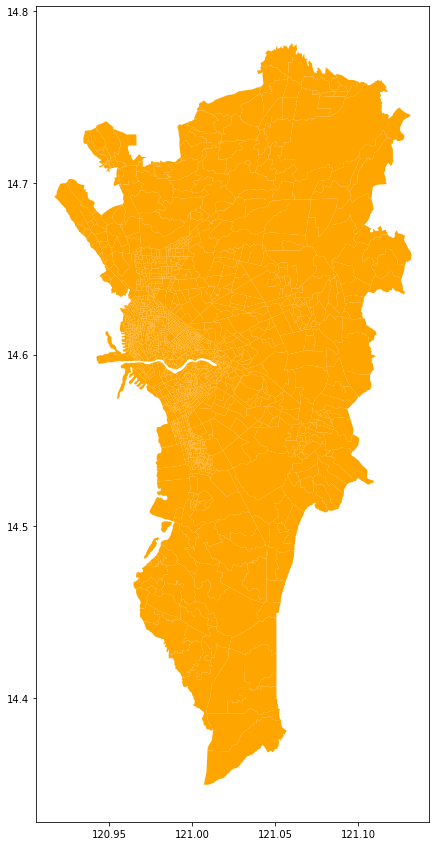

In [32]:
# Using matplotlib for plotting
fig,ax = plt.subplots(figsize=(15, 15))
metro_manila.plot(ax=ax, color='orange')

In [ ]:
metro_manila.tail()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,NL_NAME_3,VARNAME_3,TYPE_3,ENGTYPE_3,PROVINCE,REGION,geometry
1686,177,PHL,Philippines,47,Metropolitan Manila,966,Valenzuela,25828,Rincon,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,"POLYGON ((120.95553 14.70852, 120.95574 14.708..."
1687,177,PHL,Philippines,47,Metropolitan Manila,966,Valenzuela,25829,Tagalag,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,"POLYGON ((120.94740 14.72066, 120.94699 14.720..."
1688,177,PHL,Philippines,47,Metropolitan Manila,966,Valenzuela,25830,Ugong,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,"POLYGON ((121.02022 14.69872, 121.02026 14.698..."
1689,177,PHL,Philippines,47,Metropolitan Manila,966,Valenzuela,25831,Viente Reales,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,"POLYGON ((120.97366 14.71056, 120.97384 14.710..."
1690,177,PHL,Philippines,47,Metropolitan Manila,966,Valenzuela,25832,Wawang Pulo,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,"POLYGON ((120.93951 14.72433, 120.93874 14.723..."


# **Plotting cities in Metro Manila**

In [33]:
coordinates = pd.read_csv('ncr_cities_coordinates.csv',  encoding= 'latin-1')

In [34]:
coordinates

,City,Latitude,Longitude
0,Caloocan,14.756600,121.045000
1,Las Piñas,14.444500,120.993900
2,Makati,14.554700,121.024400
3,Malabon,14.668100,120.965800
4,Mandaluyong,14.579400,121.035900
5,Manila,14.599500,120.984200
6,Marikina,14.650700,121.102900
7,Muntinlupa,14.408100,121.041500
8,Navotas,14.673200,120.935000
9,Parañaque,14.479300,121.019800


**Getting the boundary of entire Metro Manila**

In [35]:
# Selecting the city columns and the geometry to dissolve
ncr_bounds = metro_manila[['NAME_1', 'geometry']]

# Dissolving the cities
entire_ncr = ncr_bounds.dissolve(by='NAME_1')

entire_ncr

,geometry
NAME_1,
Metropolitan Manila,"MULTIPOLYGON (((121.05352 14.38635, 121.05354 ..."


In [37]:
# Selecting the city columns and the geometry to dissolve
ncr_cities_boundary = metro_manila[['NAME_2', 'geometry']]

# Dissolving the cities
ncr_cities = ncr_cities_boundary.dissolve(by='NAME_2')

ncr_cities

,geometry
NAME_2,
Kalookan City,"MULTIPOLYGON (((120.97588 14.63670, 120.97599 ..."
Las Piñas,"MULTIPOLYGON (((121.02200 14.42881, 121.02174 ..."
Makati City,"POLYGON ((121.06149 14.54233, 121.06158 14.542..."
Malabon,"POLYGON ((120.95800 14.65938, 120.95796 14.658..."
Mandaluyong,"POLYGON ((121.03833 14.56937, 121.03659 14.568..."
Manila,"POLYGON ((121.00289 14.56930, 121.00268 14.569..."
Marikina,"POLYGON ((121.07896 14.62016, 121.07883 14.619..."
Muntinlupa,"POLYGON ((121.05352 14.38635, 121.05354 14.386..."
Navotas,"POLYGON ((120.96538 14.63740, 120.96536 14.637..."


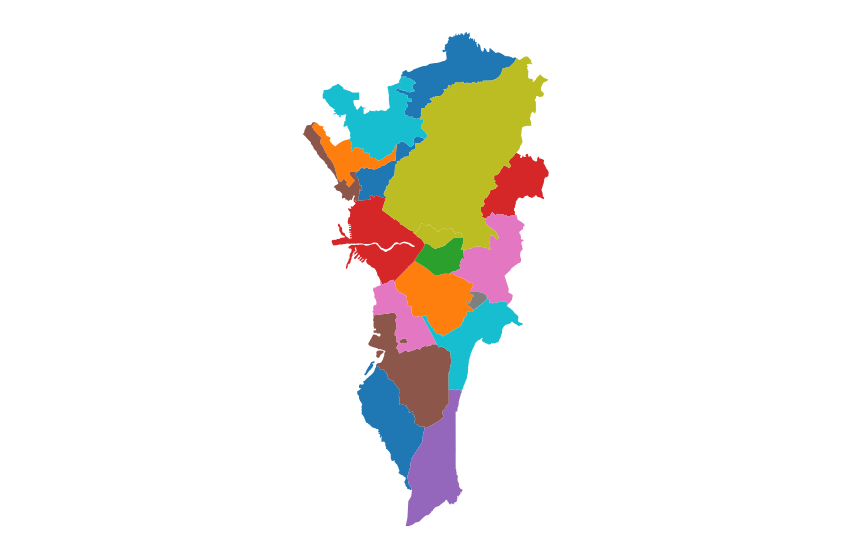

In [38]:
# create the plot
fig, ax = plt.subplots(figsize = (15, 10))

# Resetting the index, as NAME_2 is no longer a column, it is an index.
# Reset index to plot data
ncr_cities.reset_index().plot(column = 'NAME_2', ax=ax)

# Set plot axis to equal ratio
ax.set_axis_off()
plt.axis('equal');

**Unallocated Bookings**

In [40]:
# Initiating the values for unallocated bookings as 0
ncr_cities['Unallocated_Bookings'] = 0
ncr_cities

,geometry,Unallocated_Bookings
NAME_2,,
Kalookan City,"MULTIPOLYGON (((120.97588 14.63670, 120.97599 ...",0
Las Piñas,"MULTIPOLYGON (((121.02200 14.42881, 121.02174 ...",0
Makati City,"POLYGON ((121.06149 14.54233, 121.06158 14.542...",0
Malabon,"POLYGON ((120.95800 14.65938, 120.95796 14.658...",0
Mandaluyong,"POLYGON ((121.03833 14.56937, 121.03659 14.568...",0
Manila,"POLYGON ((121.00289 14.56930, 121.00268 14.569...",0
Marikina,"POLYGON ((121.07896 14.62016, 121.07883 14.619...",0
Muntinlupa,"POLYGON ((121.05352 14.38635, 121.05354 14.386...",0
Navotas,"POLYGON ((120.96538 14.63740, 120.96536 14.637...",0


In [41]:
# Verify if the Metro Manila cities became an index
ncr_cities.index

Index(['Kalookan City', 'Las Piñas', 'Makati City', 'Malabon', 'Mandaluyong',
       'Manila', 'Marikina', 'Muntinlupa', 'Navotas', 'Parañaque',
       'Pasay City', 'Pasig City', 'Pateros', 'Quezon City', 'San Juan',
       'Taguig', 'Valenzuela'],
      dtype='object', name='NAME_2')

In [42]:
# Convert numpy.float64 values in CSV columns to float for easier manipulation in plotting
latitude = coordinates['Latitude'].tolist()
longitude = coordinates['Longitude'].tolist()

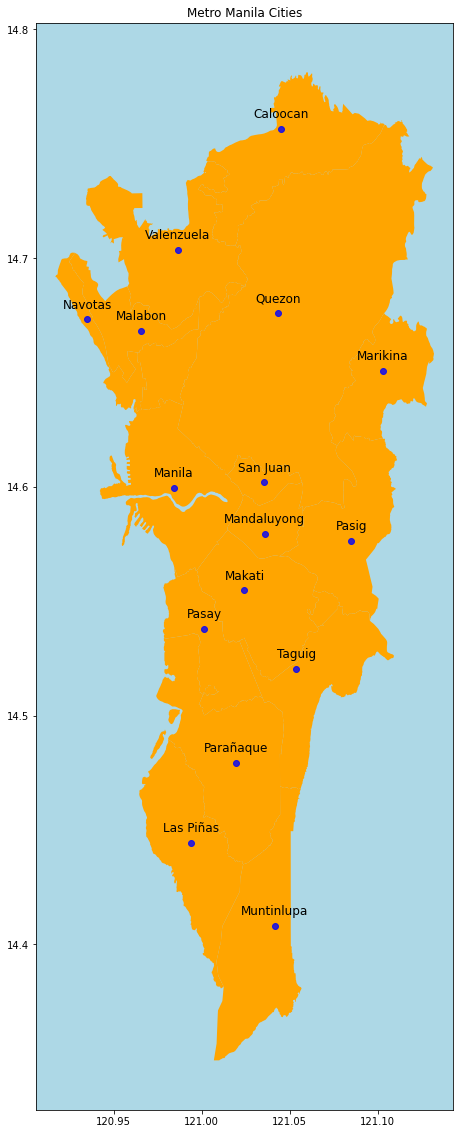

In [43]:
# Using matplotlib for plotting
plt.rcParams['figure.figsize'] = [25, 20]

fig,ax = plt.subplots()
ncr_cities.plot(ax=ax, color='orange')

# Plot Cities
ctr = 0
for c in coordinates['City']:
  # City Name
  ax.text(
      x = longitude[ctr],
      y = latitude[ctr] + 0.005,   # Adding small shift to avoid overlapping of points
      s = c,
      fontsize = 12,
      ha = 'center'
  )
  # City Location Centroid
  ax.plot(
      longitude[ctr],
      latitude[ctr],
      marker = 'o',
      c = 'blue',
      alpha = 0.8,
  )
  ctr+=1;

ax.set(
    title = 'Metro Manila Cities',
    aspect = 1.3,
    facecolor = 'lightblue'
)

plt.show()

# **Plotting unallocated bookings in data map**

---



In [ ]:
df = data.drop(['source', 'created_at_local', 'drop_off_latitude', 'drop_off_longitude', 'pick_up_distance'], axis = 1)
df = df[df['state'] == 'UNALLOCATED'][df['city'] == 'Metro Manila']
df
# data[data['state'] == 'UNALLOCATED']

In [46]:
# Converting grab pick up points to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.pick_up_longitude, df.pick_up_latitude))

In [47]:
gdf.head()

,pick_up_latitude,pick_up_longitude,city,fare,state,geometry
41,14.681922,121.042110,Metro Manila,0.0,UNALLOCATED,POINT (121.04211 14.68192)
42,12.879721,121.774017,Metro Manila,0.0,UNALLOCATED,POINT (121.77402 12.87972)
43,14.576147,121.080195,Metro Manila,0.0,UNALLOCATED,POINT (121.08019 14.57615)
44,14.569208,121.060157,Metro Manila,0.0,UNALLOCATED,POINT (121.06016 14.56921)
45,14.556254,121.074355,Metro Manila,0.0,UNALLOCATED,POINT (121.07436 14.55625)


In [48]:
gdf = gdf.drop('fare', axis = 1)
gdf_filtered = gdf.reset_index(drop=True)

In [49]:
len(gdf_filtered)

119930

# **Filtering areas that are outside of Metro Manila**

In [ ]:
# Removing pick up points that are out of bounds
for i in range(len(gdf_filtered)):
    try:
      if not gdf_filtered.iloc[i, 4].within(entire_ncr.iloc[0, 0]):
        gdf_filtered = gdf_filtered.drop([i], axis = 0)
      # print('Out', i)      # for validation
    except IndexError:
      print('InexError Exception! You reached the end of the dataframe.')
      break  


#gdf.iloc[0, 5].within(entire_ncr.iloc[0, 0])

In [ ]:
gdf_filtered.head(10)

,pick_up_latitude,pick_up_longitude,city,state,geometry
0,14.681922,121.042110,Metro Manila,UNALLOCATED,POINT (121.04211 14.68192)
2,14.576147,121.080195,Metro Manila,UNALLOCATED,POINT (121.08019 14.57615)
3,14.569208,121.060157,Metro Manila,UNALLOCATED,POINT (121.06016 14.56921)
4,14.556254,121.074355,Metro Manila,UNALLOCATED,POINT (121.07436 14.55625)
5,14.604869,121.037924,Metro Manila,UNALLOCATED,POINT (121.03792 14.60487)
6,14.549346,121.099429,Metro Manila,UNALLOCATED,POINT (121.09943 14.54935)
7,14.557461,121.020717,Metro Manila,UNALLOCATED,POINT (121.02072 14.55746)
8,14.630462,121.066474,Metro Manila,UNALLOCATED,POINT (121.06647 14.63046)
9,14.587251,121.051652,Metro Manila,UNALLOCATED,POINT (121.05165 14.58725)
10,14.541965,121.038975,Metro Manila,UNALLOCATED,POINT (121.03897 14.54196)


In [52]:
# Exporting the filtered coordinates in Grab data in CSV
csv_gdf_filtered = gdf_filtered.to_csv('Filtered Coordinates in Grab Data.csv')

# **Tabulating Unallocated Bookings in Each City**

In [ ]:
# Tabulating number of unallocated bookings in NCR CITIES
for i in range(len(gdf_filtered)):
  for j in ncr_cities.index:
   #print(j, ncr_cities['Unallocated_Bookings'][j])
    try:
      if gdf_filtered.iloc[i, 4].within(ncr_cities['geometry'][j]):
        ncr_cities['Unallocated_Bookings'][j] = np.add(ncr_cities['Unallocated_Bookings'][j], 1)     # Incrementing unallocated bookings
        print(i, j,  ncr_cities['Unallocated_Bookings'][j])
    except IndexError:
      print('IndexError Exception! You reached the end of the dataframe.')
      break  

In [ ]:
# ncr_cities.iloc[0,1]
for j in ncr_cities.index:
  print(ncr_cities['geometry'][j])

In [ ]:
ncr_cities

,geometry,Unallocated_Bookings
NAME_2,,
Kalookan City,"MULTIPOLYGON (((120.97588 14.63670, 120.97599 ...",1042
Las Piñas,"MULTIPOLYGON (((121.02200 14.42881, 121.02174 ...",1104
Makati City,"POLYGON ((121.06149 14.54233, 121.06158 14.542...",40178
Malabon,"POLYGON ((120.95800 14.65938, 120.95796 14.658...",307
Mandaluyong,"POLYGON ((121.03833 14.56937, 121.03659 14.568...",9963
Manila,"POLYGON ((121.00289 14.56930, 121.00268 14.569...",10170
Marikina,"POLYGON ((121.07896 14.62016, 121.07883 14.619...",1577
Muntinlupa,"POLYGON ((121.05352 14.38635, 121.05354 14.386...",1394
Navotas,"POLYGON ((120.96538 14.63740, 120.96536 14.637...",97


In [ ]:
tabulated_unallocated_bookings = ncr_cities.to_csv('Tabulated Unallocated Bookings in Metro Manila Cities.csv')

# **Heatmap of Unallocated Bookings**

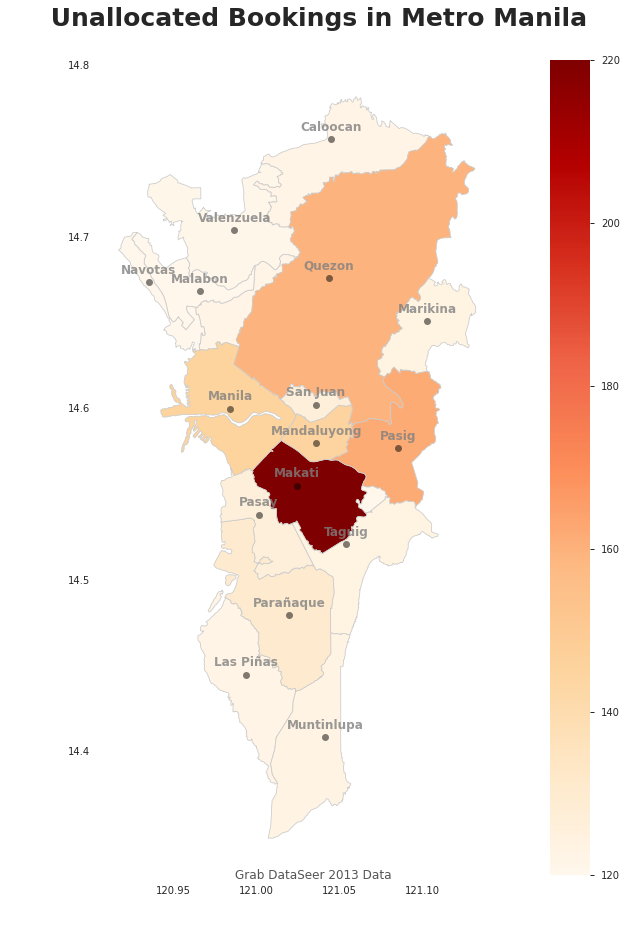

In [ ]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Unallocated_Bookings'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 15))
#fig.suptitle('Unallocated Bookings in Metro Manila\n', horizontalalignment = 'center', fontsize=40)

ncr_cities.plot(column=variable, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', )

# add a title

ax.set_title('     Unallocated Bookings in Metro Manila\n', fontdict={'fontsize': 25, 'fontweight' : 3}, horizontalalignment = 'center', weight = 'bold' , family = 'sans-serif')
# create an annotation for the data source
ax.annotate('Grab DataSeer 2013 Data',xy=(0.5, .08), xycoords='figure fraction', horizontalalignment='center', verticalalignment='top', fontsize=12, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)


# Plot Cities
ctr = 0
for c in coordinates['City']:
  # City Name
  ax.text(
      x = longitude[ctr],
      y = latitude[ctr] + 0.005,   # Adding small shift to avoid overlapping of points
      s = c,
      fontsize = 12,
      color = 'grey',
      alpha = 0.8,
      weight ='bold',
      ha = 'center'
  )
  # City Location Centroid
  ax.plot(
      longitude[ctr],
      latitude[ctr],
      marker = 'o',
      c = 'black',
      alpha = 0.5,
  )
  ctr+=1;


# Saving our map as .png file.
fig.savefig('map_export.png', dpi=300)


In [56]:
from matplotlib.colors import LogNorm

[Text(0.5, 1.0, 'Metro Manila Cities'), None, None]

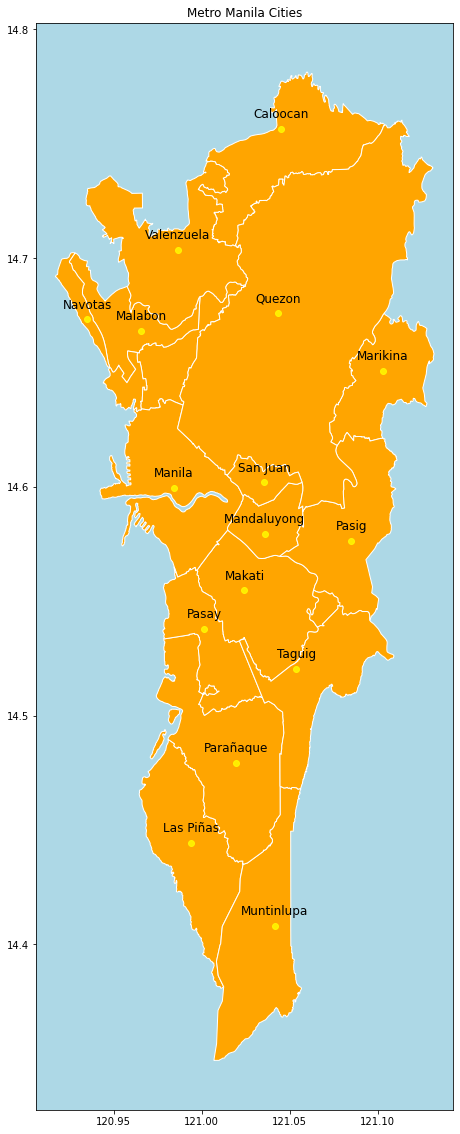

In [57]:
# Using matplotlib for plotting
# plt.rcParams['figure.figsize'] = [25, 25]

# fig,ax = plt.subplots()
# metro_manila.plot(ax=ax, color='orange')

ax = ncr_cities.plot(color = 'orange', edgecolor = 'white')

# Plot Cities
ctr = 0
for c in coordinates['City']:
  # City Name
  ax.text(
      x = longitude[ctr],
      y = latitude[ctr] + 0.005,   # Adding small shift to avoid overlapping of points
      s = c,
      fontsize = 12,
      ha = 'center'
  )
  # City Location Centroid
  ax.plot(
      longitude[ctr],
      latitude[ctr],
      marker = 'o',
      c = 'yellow',
      alpha = 0.8,
  )
  ctr+=1;


# Plotting scatter points way #1
# for i in range(len(df)) :

# for i in range(len(df)) :
#   plt.plot(
#       df.iloc[i, 1], 
#       df.iloc[i, 0],
#       marker = 'o',
#       c = 'purple',
#       alpha = 0.5
#   )

# Plotting scatter points way #2
#plt.hist2d(gdf_filtered['pick_up_longitude'], gdf['pick_up_latitude'], norm = LogNorm(), cmap = 'PiYG', bins = 1000, alpha =1, zorder = 3 )

# Plotting scatter points way #3
# gdf_filtered.plot(ax=ax, color = 'red')

ax.set(
    title = 'Metro Manila Cities',
    aspect = 1.3,
    facecolor = 'lightblue'
)
